# Combining Datasets

Datasets can be combined along the items and time axis

In [1]:
import matplotlib.pyplot as plt
import mikeio
from mikeio import Dataset

## Concatenate Datasets (combine in time)

In [2]:
ds1 = mikeio.read("../tests/testdata/tide1.dfs1")
ds1

<mikeio.Dataset>
Dimensions: (97, 10)
Time: 2019-01-01 00:00:00 - 2019-01-03 00:00:00
Items:
  0:  Level <Water Level> (meter)

In [3]:
ds2 = mikeio.read("../tests/testdata/tide2.dfs1") + 0.5  # add offset
ds2


<mikeio.Dataset>
Dimensions: (97, 10)
Time: 2019-01-02 00:00:00 - 2019-01-04 00:00:00
Items:
  0:  Level <Water Level> (meter)

Concatenating data along the time axis can be done in two ways:

* ds = Dataset.combine([ds1, ds2, ...])  # make a copy
* ds1.concat(ds2)   # inplace - changes ds1

In [4]:
ds3 = Dataset.combine([ds1, ds2]) # same as ds1._concat_time(ds2)
ds3

<mikeio.Dataset>
Dimensions: (145, 10)
Time: 2019-01-01 00:00:00 - 2019-01-04 00:00:00
Items:
  0:  Level <Water Level> (meter)

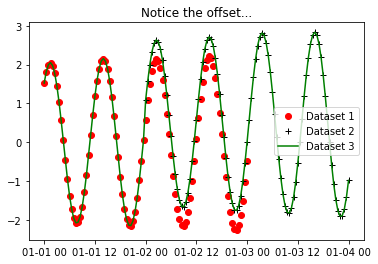

In [5]:
plt.plot(ds1.time, ds1.data[0][:,1], 'ro', label="Dataset 1")
plt.plot(ds2.time, ds2.data[0][:,1], 'k+', label="Dataset 2")
plt.plot(ds3.time, ds3.data[0][:,1], 'g-', label="Dataset 3")
plt.title("Notice the offset...")
plt.legend();

In [6]:
ds1.concat(ds2)   # do it inplace instead

In [7]:
ds1

<mikeio.Dataset>
Dimensions: (145, 10)
Time: 2019-01-01 00:00:00 - 2019-01-04 00:00:00
Items:
  0:  Level <Water Level> (meter)

## Append items

In [8]:
dsA = mikeio.read("../tests/testdata/tide1.dfs1")
dsA.items

[Level <Water Level> (meter)]

In [9]:
dsB = dsA.copy()
dsB.items[0].name = 'Other_level'
dsB = dsB + 2
dsB.items

[Other_level <Water Level> (meter)]

Appending items can be done in two ways:

* ds = Dataset.combine([ds1, ds2, ...])  # make a copy
* ds1.append_items(ds2)   # inplace - changes ds1

In [10]:
dsC = Dataset.combine([dsA, dsB])

In [11]:
dsC.items

[Level <Water Level> (meter), Other_level <Water Level> (meter)]

In [12]:
dsC.data[0].mean(), dsC.data[1].mean()

(0.06780668046498269, 2.0678066804649826)

In [13]:
dsA.append_items(dsB)   # do it inplace instead
dsA

<mikeio.Dataset>
Dimensions: (97, 10)
Time: 2019-01-01 00:00:00 - 2019-01-03 00:00:00
Items:
  0:  Level <Water Level> (meter)
  1:  Other_level <Water Level> (meter)